# IE7275: Data Mining in Engineering
## Quiz 2 – Fall 2025

This quiz contains **20 graduate-level Python questions**, covering topics in data understanding and exploration.  

Topics include:  
- Python basics (variables, loops, functions, data structures)  
- NumPy arrays and statistics  
- Pandas DataFrame manipulation  
- Data visualization with Matplotlib & Seaborn  
- Descriptive statistics & skewness  
- Handling missing values & outliers  
- Encoding categorical variables  
- Class imbalance & evaluation metrics  
- Correlation and feature interactions  

---

**Instructions:**  
- Answer all questions in Python.  
- Show outputs clearly (tables/plots where requested).  
- Submit your completed notebook as a PDF on Canvas.  
- Time allowed: 90 minutes.  


### Dataset 1: Iris Dataset (for Q1–Q5, Q19–Q20)
Load the dataset:

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

iris = sns.load_dataset('iris')
iris.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


**Q1.**  
Display Python version and check versions of `numpy`, `pandas`, and `matplotlib`.  

**Q2.**  
Compute the average sepal_length and petal_length for each species in the Iris dataset.  

**Q3.**  
Plot a histogram of petal_width for all species. Compare its distribution across species.  

**Q4.**  
Compute and visualize the correlation matrix of the Iris numerical features using a heatmap.  

**Q5.**  
Generate a scatter plot matrix (pairplot) for all numeric features, colored by species.  


In [2]:
# Q1 Response
import sys
import numpy as np
import pandas as pd
import matplotlib as mp
print("My Python version is",sys.version)
print("My numpy version is",np.__version__)
print("My pandas version is",pd.__version__)
print("My matplotlib version is",mp.__version__)

My Python version is 3.12.11 (main, Jun  4 2025, 08:56:18) [GCC 11.4.0]
My numpy version is 2.0.2
My pandas version is 2.2.2
My matplotlib version is 3.10.0


In [3]:
# Q2 Response
average_lengths_by_species = iris.groupby('species')[['sepal_length', 'petal_length']].mean()
print("Average sepal_length and petal_length for each species are mentioned below:")
print(average_lengths_by_species)

Average sepal_length and petal_length for each species are mentioned below:
            sepal_length  petal_length
species                               
setosa             5.006         1.462
versicolor         5.936         4.260
virginica          6.588         5.552


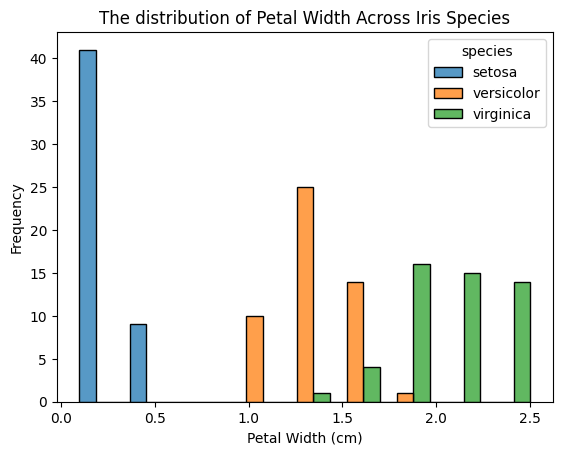

In [4]:
# Q3 Response
sns.histplot(data=iris,
             x='petal_width',
             hue='species',
             multiple='dodge')
plt.title('The distribution of Petal Width Across Iris Species')
plt.xlabel('Petal Width (cm)')
plt.ylabel('Frequency')
plt.show()

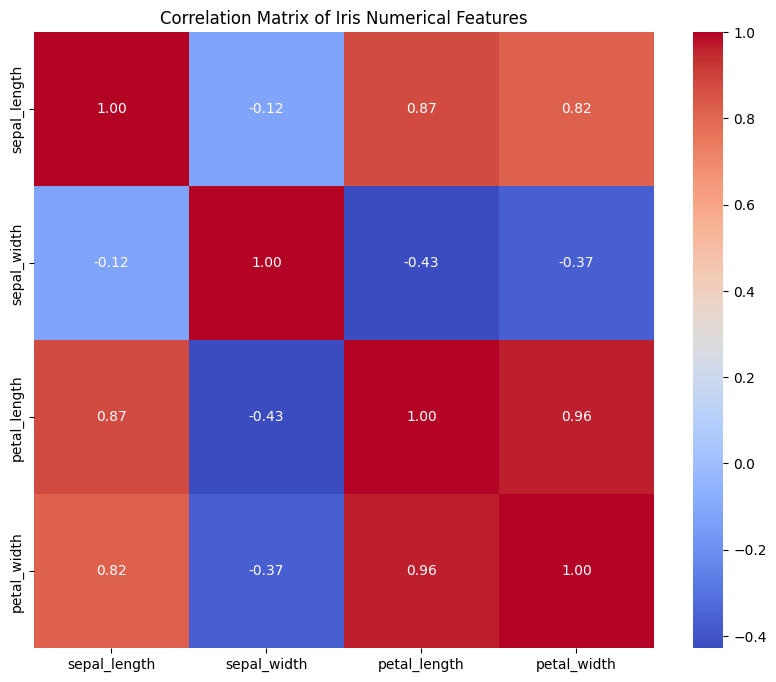

In [5]:
# Q4 Response
# Selecting only the numerical features
numerical_iris = iris.select_dtypes(include=np.number)

# Computing the correlation matrix
correlation_matrix = numerical_iris.corr()

# Visualizing the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix,
            annot=True,
            cmap='coolwarm',
            fmt=".2f")
plt.title('Correlation Matrix of Iris Numerical Features')
plt.show()

Here, values close to 1 indicates two features have strong correlation which means if one feature increase then the corresponding feature also increase. For example, **petal_length** and **petal_width** shows __0.96__ correlation means longer petals have larger widths.

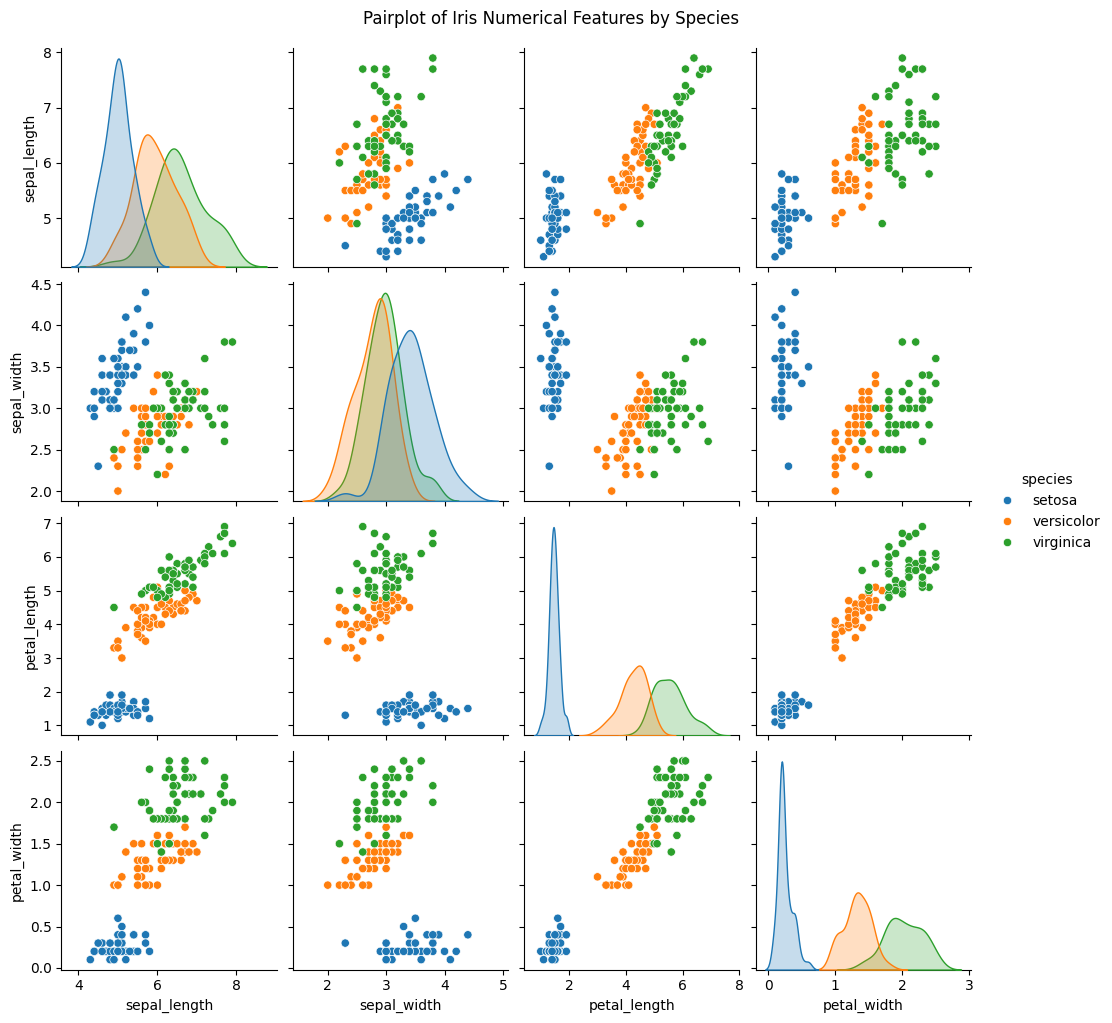

In [6]:
# Q5 Response
sns.pairplot(iris,
             hue='species')
plt.suptitle('Pairplot of Iris Numerical Features by Species',
             y = 1.02)
plt.show()

### Dataset 2: Random Numerical Data (for Q6–Q10)
Generate the dataset:

In [7]:
np.random.seed(42)
num_data = pd.DataFrame({
    'A': np.random.normal(50, 10, 100),
    'B': np.random.randint(0, 100, 100),
    'C': np.random.uniform(0, 1, 100)
})
num_data.head()


,A,B,C
0,54.967142,8,0.846661
1,48.617357,61,0.856324
2,56.476885,36,0.404508
3,65.230299,96,0.887770
4,47.658466,50,0.850928


**Q6.**  
Create a NumPy array of shape (5,4) with random integers between 1 and 20. Compute its mean and standard deviation.  

**Q7.**  
For dataset `num_data`, compute mean, median, variance, and range for column A.  

**Q8.**  
Plot a boxplot of column B. Identify potential outliers.  

**Q9.**  
Compute skewness of column A. Plot a histogram with KDE overlay. Interpret whether the data is positively or negatively skewed.  

**Q10.**  
Plot histograms of column C with 10 bins, 30 bins, and a KDE curve. Compare the visual differences.  


In [8]:
# Q6 Response
rnd_array = np.random.randint(1,
                              21,
                              size=(5, 4)) # I have given the shape 5 X 4
print("Random NumPy array:")
print(rnd_array)

mean_value = np.mean(rnd_array)
std_dev_value = np.std(rnd_array)

print("Mean of the array:", mean_value)
print("Standard deviation of the array:", std_dev_value)

Random NumPy array:
[[12 12  5  7]
 [ 4  6 13 20]
 [15  3  8 20]
 [16 13 18 10]
 [19 17 19  5]]
Mean of the array: 12.1
Standard deviation of the array: 5.647123161398199


In [9]:
# Q7 Response
meanofA = num_data['A'].mean()
medianofA = num_data['A'].median()
varianceofA = num_data['A'].var()

# Computing the range for column A
rangeofA = num_data['A'].max() - num_data['A'].min()

print(f"Mean of column A: {meanofA:.2f}")
print(f"Median of column A: {medianofA:.2f}")
print(f"Variance of column A: {varianceofA:.2f}")
print(f"Range of column A: {rangeofA:.2f}")

Mean of column A: 48.96
Median of column A: 48.73
Variance of column A: 82.48
Range of column A: 44.72


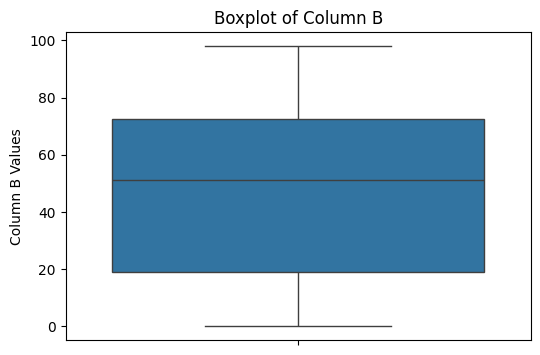

In [10]:
# Q8 Response
plt.figure(figsize=(6, 4))
sns.boxplot(y=num_data['B'])
plt.title('Boxplot of Column B')
plt.ylabel('Column B Values')
plt.show()

Skewness of column A: -0.18


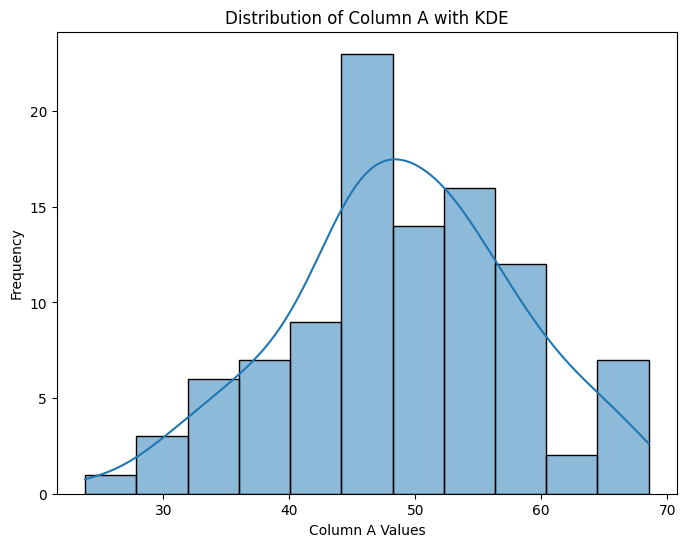


Interpretation: The skewness value is close to 0, and the distribution in the histogram appears roughly symmetrical. This indicates that column A is approximately normally distributed.


In [11]:
# Q9
# Computing skewness of column A
skewness_A = num_data['A'].skew()
print(f"Skewness of column A: {skewness_A:.2f}")

# Plotting a histogram with KDE overlay for column A
plt.figure(figsize=(8, 6))
sns.histplot(data=num_data,
             x='A',
             kde=True)
plt.title('Distribution of Column A with KDE')
plt.xlabel('Column A Values')
plt.ylabel('Frequency')
plt.show()

# Interpretation of skewness
if skewness_A > 0.5:
    print("\nInterpretation: The skewness value is positive and significantly greater than 0, and the distribution in the histogram is slightly skewed to the right (the tail is longer on the right side). This indicates that column A is positively skewed.")
elif skewness_A < -0.5:
    print("\nInterpretation: The skewness value is negative and significantly less than 0, and the distribution in the histogram is skewed to the left (the tail is longer on the left side). This indicates that column A is negatively skewed.")
else:
    print("\nInterpretation: The skewness value is close to 0, and the distribution in the histogram appears roughly symmetrical. This indicates that column A is approximately normally distributed.")

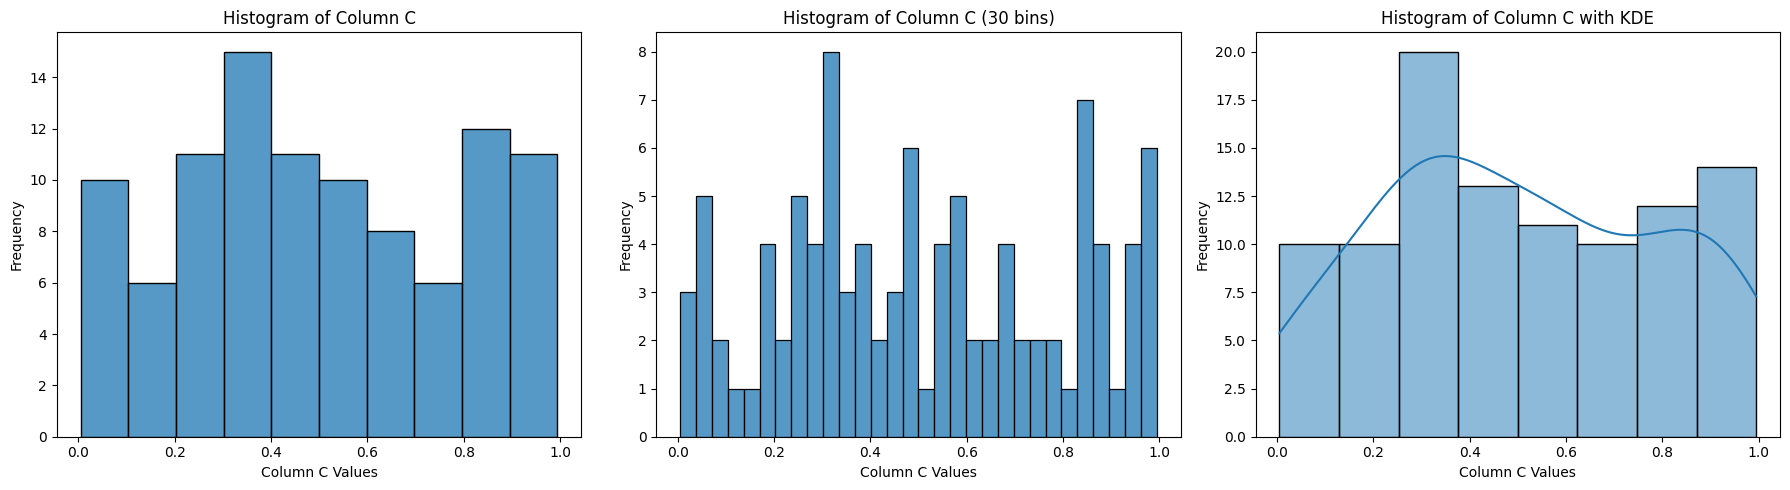

In [12]:
# Q10 Response
plt.figure(figsize=(18, 5))

# Histogram - 10 bins
plt.subplot(1, 3, 1)
sns.histplot(data=num_data,
             x='C',
             bins=10)
plt.title('Histogram of Column C')
plt.xlabel('Column C Values')
plt.ylabel('Frequency')

# Histogram with 30 bins
plt.subplot(1, 3, 2)
sns.histplot(data=num_data, x='C', bins=30)
plt.title('Histogram of Column C (30 bins)')
plt.xlabel('Column C Values')
plt.ylabel('Frequency')

# Histogram with KDE overlay
plt.subplot(1, 3, 3)
sns.histplot(data=num_data, x='C', kde=True)
plt.title('Histogram of Column C with KDE')
plt.xlabel('Column C Values')
plt.ylabel('Frequency')

plt.tight_layout() # Here, I am adjusting layout to prevent overlapping titles/labels
plt.show()

### Dataset 3: Student Scores Data (for Q11–Q15)
Generate the dataset:

In [13]:
students = pd.DataFrame({
    'Name': ['Alice','Bob','Charlie','David','Eva','Frank','Grace','Hannah'],
    'Math': [75,58,90,45,83,95,67,72],
    'Reading': [65,70,85,50,90,88,76,60],
    'Gender': ['F','M','M','M','F','M','F','F'],
    'Passed': [1,0,1,0,1,1,1,1]
})
students.head()


,Name,Math,Reading,Gender,Passed
0,Alice,75,65,F,1
1,Bob,58,70,M,0
2,Charlie,90,85,M,1
3,David,45,50,M,0
4,Eva,83,90,F,1


**Q11.**  
Write a Python function that takes Math and Reading scores from the `students` dataset and returns their average. Apply it for each student.  

**Q12.**  
One-hot encode the `Gender` column. Show the transformed DataFrame.  

**Q13.**  
Count the frequency of Passed vs Not Passed students. Plot the distribution using a bar chart.  

**Q14.**  
Create boxplots comparing Math scores grouped by Gender. Interpret whether there is a visible difference.  

**Q15.**  
For the Math column, combine histogram, KDE, and boxplot into one figure. Provide an interpretation report.  


In [14]:
# Q11 Response
# Defining a function to calculate the average of two scores
def calculate_average_score(math_score, reading_score):
  """Calculates the average of math and reading scores."""
  return (math_score + reading_score) / 2

# Applying the function to the 'students' DataFrame
students['Average_Score_Apply'] = students.apply(lambda row: calculate_average_score(row['Math'],
                                                                                     row['Reading']),
                                                                                     axis=1)
students['Average_Score_Arithmetic'] = (students['Math'] + students['Reading']) / 2


print("Students DataFrame with Average Scores:")
print(students)

Students DataFrame with Average Scores:
      Name  Math  Reading Gender  Passed  Average_Score_Apply  \
0    Alice    75       65      F       1                 70.0   
1      Bob    58       70      M       0                 64.0   
2  Charlie    90       85      M       1                 87.5   
3    David    45       50      M       0                 47.5   
4      Eva    83       90      F       1                 86.5   
5    Frank    95       88      M       1                 91.5   
6    Grace    67       76      F       1                 71.5   
7   Hannah    72       60      F       1                 66.0   

   Average_Score_Arithmetic  
0                      70.0  
1                      64.0  
2                      87.5  
3                      47.5  
4                      86.5  
5                      91.5  
6                      71.5  
7                      66.0  


In [15]:
# Q12 Response
students_encoded = pd.get_dummies(students,
                                  columns=['Gender'],
                                  drop_first=False)

# Converting the boolean columns created by get_dummies to int (0 or 1)
gender_cols = [col for col in students_encoded.columns if col.startswith('Gender_')]
students_encoded[gender_cols] = students_encoded[gender_cols].astype(int)

print("Students DataFrame after One-Hot Encoding Gender:")
print(students_encoded)

Students DataFrame after One-Hot Encoding Gender:
      Name  Math  Reading  Passed  Average_Score_Apply  \
0    Alice    75       65       1                 70.0   
1      Bob    58       70       0                 64.0   
2  Charlie    90       85       1                 87.5   
3    David    45       50       0                 47.5   
4      Eva    83       90       1                 86.5   
5    Frank    95       88       1                 91.5   
6    Grace    67       76       1                 71.5   
7   Hannah    72       60       1                 66.0   

   Average_Score_Arithmetic  Gender_F  Gender_M  
0                      70.0         1         0  
1                      64.0         0         1  
2                      87.5         0         1  
3                      47.5         0         1  
4                      86.5         1         0  
5                      91.5         0         1  
6                      71.5         1         0  
7                      66.0

Here 1 means True and 0 means False.

Frequency of Passed (1) vs Not Passed (0) students:
Passed
1    6
0    2
Name: count, dtype: int64


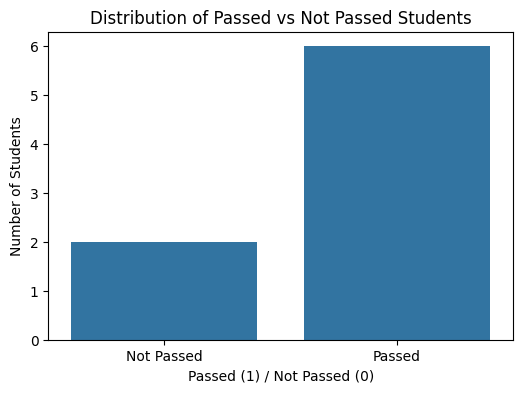

In [16]:
# Q13 Response
passed_counts = students['Passed'].value_counts()

print("Frequency of Passed (1) vs Not Passed (0) students:")
print(passed_counts)

# Plotting the distribution using a bar chart
plt.figure(figsize=(6, 4))
sns.countplot(data=students,
              x='Passed')
plt.title('Distribution of Passed vs Not Passed Students')
plt.xlabel('Passed (1) / Not Passed (0)')
plt.ylabel('Number of Students')
plt.xticks([0, 1], ['Not Passed', 'Passed'])
plt.show()

Here we can see, there are more passed students than failed students in the dataset

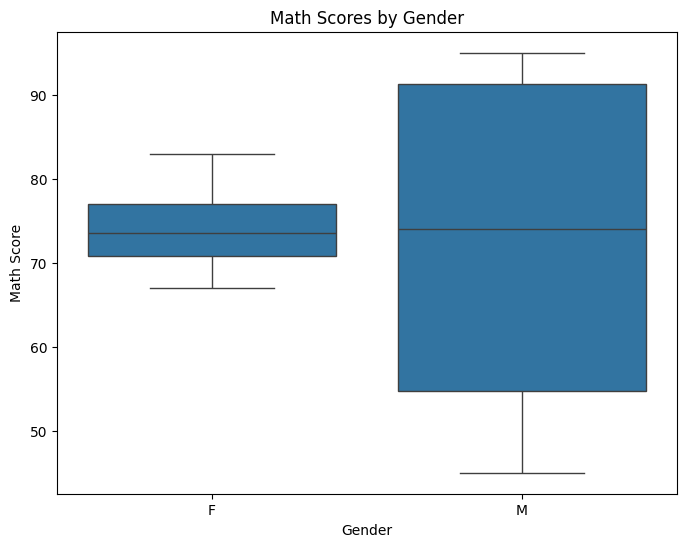

In [17]:
# Q14 Response
plt.figure(figsize=(8, 6))
sns.boxplot(data=students,
            x='Gender',
            y='Math')
plt.title('Math Scores by Gender')
plt.xlabel('Gender')
plt.ylabel('Math Score')
plt.show()

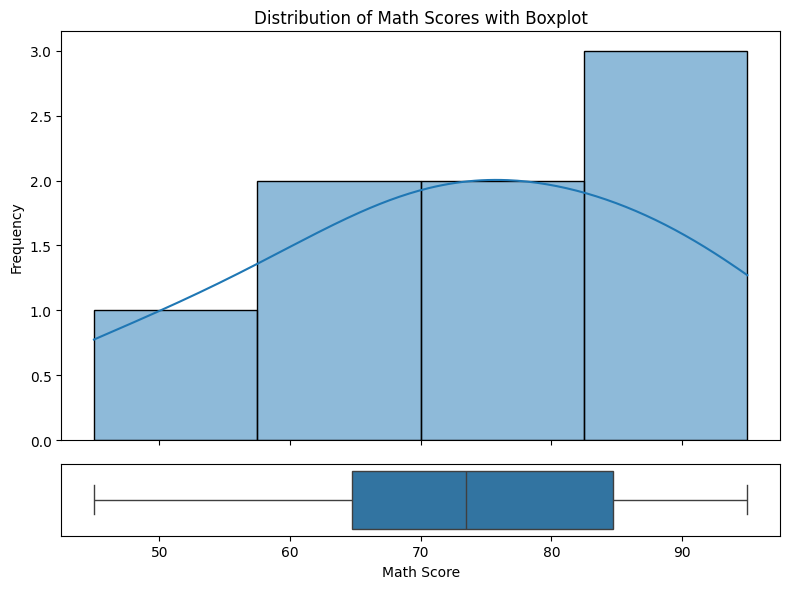

In [18]:
# Q15 Response
fig, (ax_hist, ax_box) = plt.subplots(2,
                                     sharex=True,
                                     gridspec_kw={"height_ratios": (.85, .15)},
                                     figsize=(8, 6))

# Plotting histogram and KDE on the top subplot
sns.histplot(data=students,
             x='Math',
             kde=True,
             ax=ax_hist)
ax_hist.set_ylabel('Frequency')
ax_hist.set_title('Distribution of Math Scores with Boxplot')

# Plotting boxplot on the bottom subplot
sns.boxplot(data=students,
            x='Math',
            ax=ax_box)
ax_box.set_xlabel('Math Score')
ax_box.set_yticks([])

plt.tight_layout()
plt.show()

### Dataset 4: Imbalanced Classification Data (for Q16–Q18)
Generate the dataset:

In [19]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=200, n_features=5, n_informative=3,
                           n_redundant=0, weights=[0.8,0.2], random_state=42)
imb_data = pd.DataFrame(X, columns=[f'Feature{i}' for i in range(1,6)])
imb_data['Target'] = y
imb_data['Target'].value_counts()


,count
Target,
0,160
1,40


**Q16.**  
Check class imbalance in the Target column. Resample the minority class (oversampling). Report new class counts.  

**Q17.**  
Fit a logistic regression model on the original imbalanced dataset. Evaluate it using precision, recall, and F1-score.  

**Q18.**  
Compute correlation matrix of features in `imb_data`. Create a clustered heatmap to show redundancy.  


In [20]:
# Q16 Response
from imblearn.over_sampling import SMOTE

# Checking the initial class imbalance
print("Initial class counts in 'Target' column:")
print(imb_data['Target'].value_counts())

# Separating the features (X) and target (y)
X = imb_data.drop('Target', axis=1)
y = imb_data['Target']

# Applying SMOTE for oversampling the minority class
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Checking class counts after oversampling
print("\nClass counts in 'Target' column after oversampling:")
print(y_resampled.value_counts())

Initial class counts in 'Target' column:
Target
0    160
1     40
Name: count, dtype: int64

Class counts in 'Target' column after oversampling:
Target
0    160
1    160
Name: count, dtype: int64


In [21]:
# Q17 Response
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

# Separating features (X_orig) and target (y_orig) from the original imbalanced dataset
X_orig = imb_data.drop('Target', axis=1)
y_orig = imb_data['Target']

# Spliting the original data into training and testing sets
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(X_orig,
                                                                        y_orig,
                                                                        test_size=0.3, # Using 30% for testing
                                                                        random_state=42,
                                                                        stratify=y_orig)

# Initialize and train a Logistic Regression model
model = LogisticRegression(random_state=42)
model.fit(X_train_orig, y_train_orig)

# Making predictions on the test set
y_pred_orig = model.predict(X_test_orig)

# Evaluating the model using precision, recall, and F1-score
precision_orig = precision_score(y_test_orig, y_pred_orig)
recall_orig = recall_score(y_test_orig, y_pred_orig)
f1_orig = f1_score(y_test_orig, y_pred_orig)

print("Evaluation Metrics for Logistic Regression on Original Imbalanced Dataset:")
print(f"Precision: {precision_orig:.2f}")
print(f"Recall: {recall_orig:.2f}")
print(f"F1-score: {f1_orig:.2f}")

# Or else we can print a full classification report
print("\nClassification Report:")
print(classification_report(y_test_orig, y_pred_orig))

Evaluation Metrics for Logistic Regression on Original Imbalanced Dataset:
Precision: 1.00
Recall: 0.83
F1-score: 0.91

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        48
           1       1.00      0.83      0.91        12

    accuracy                           0.97        60
   macro avg       0.98      0.92      0.94        60
weighted avg       0.97      0.97      0.97        60



**Q19.**  
Using Iris dataset, create grouped boxplots of petal_length by species. Interpret which species differ most.  

**Q20.**  
Create an exploratory dashboard for Iris dataset including correlation heatmap, pairplot, and grouped boxplots. Summarize key findings.  


In [22]:
!pip install pandas-profiling

  Using cached visions-0.7.4-py3-none-any.whl.metadata (5.9 kB)
Using cached visions-0.7.4-py3-none-any.whl (102 kB)
  Attempting uninstall: visions
    Found existing installation: visions 0.8.1
    Uninstalling visions-0.8.1:
      Successfully uninstalled visions-0.8.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ydata-profiling 4.16.1 requires visions[type_image_path]<0.8.2,>=0.7.5, but you have visions 0.7.4 which is incompatible.


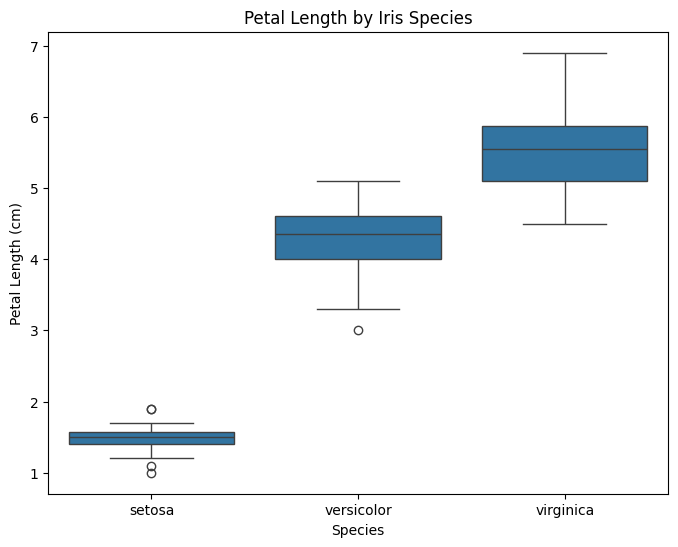

In [23]:
# Q19 Response
plt.figure(figsize=(8, 6))
sns.boxplot(data=iris,
            x='species',
            y='petal_length')
plt.title('Petal Length by Iris Species')
plt.xlabel('Species')
plt.ylabel('Petal Length (cm)')
plt.show()

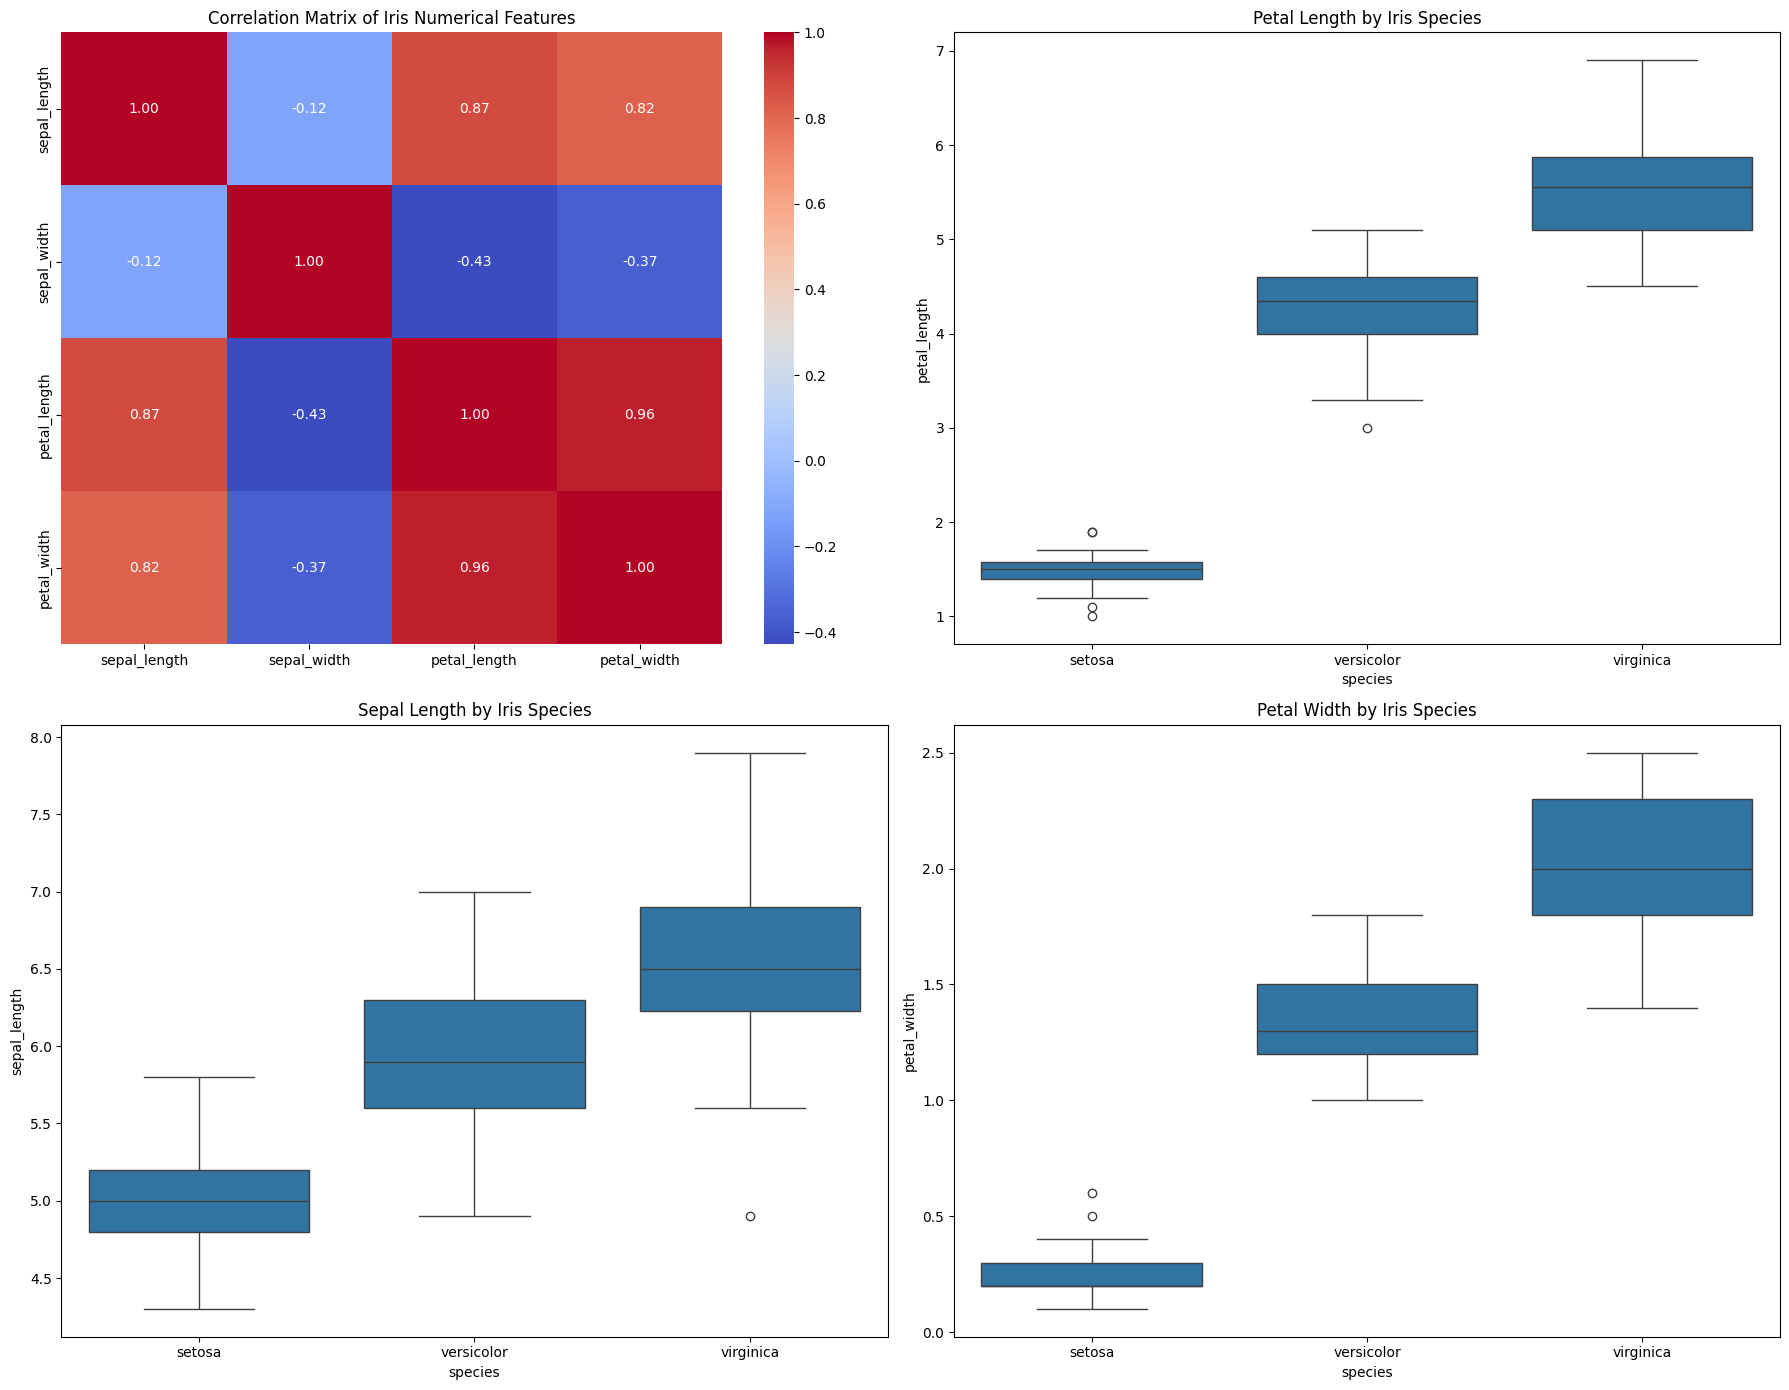

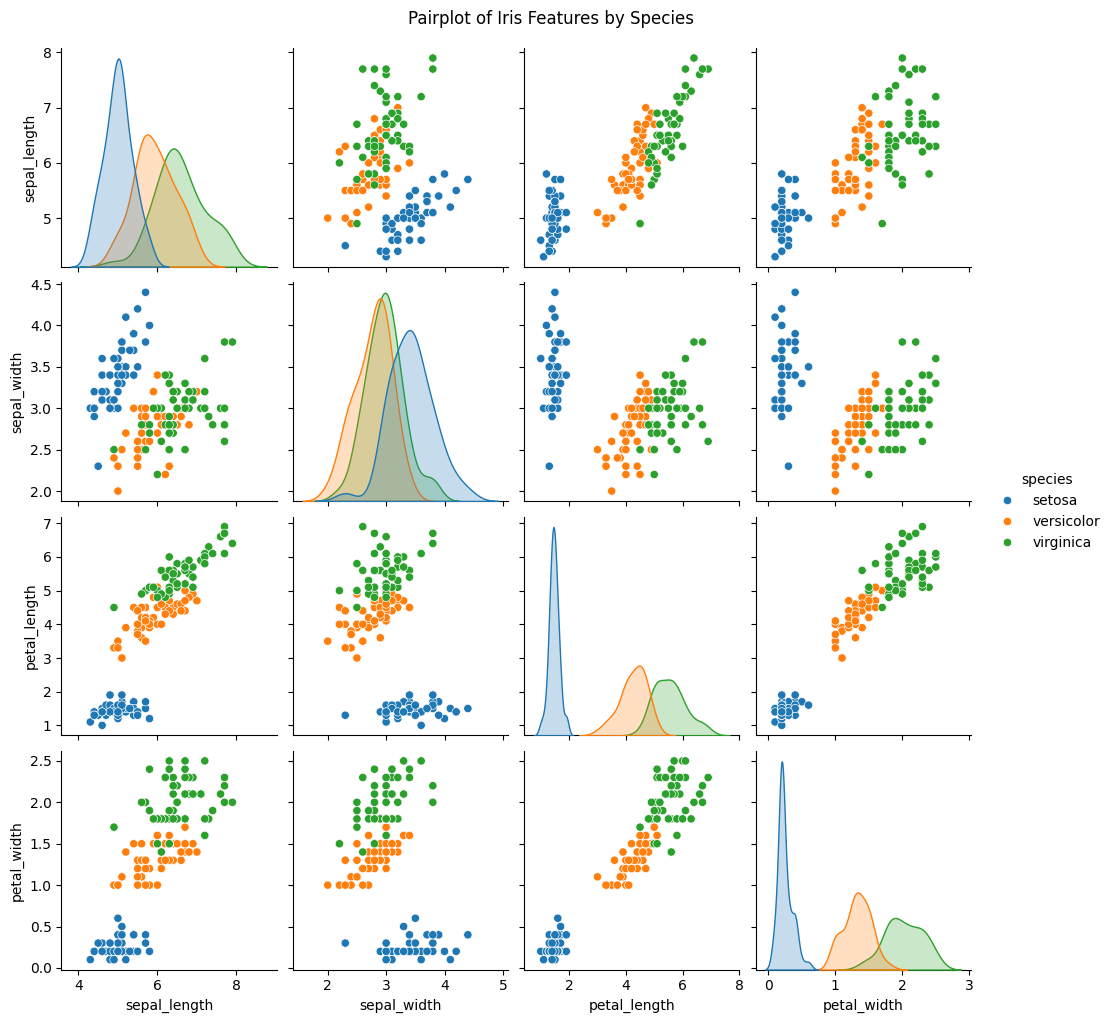

In [27]:
# Q20 Response
import seaborn as sns
import matplotlib.pyplot as plt

# Creating a figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(18, 14))

# 1. Correlation Heatmap
correlation_matrix = iris.drop('species', axis=1).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", ax=axes[0, 0])
axes[0, 0].set_title('Correlation Matrix of Iris Numerical Features')

# 2. Grouped Boxplots of petal_length by species
sns.boxplot(data=iris, x='species', y='petal_length', ax=axes[0, 1])
axes[0, 1].set_title('Petal Length by Iris Species')

# 3. Grouped Boxplots of sepal_length by species
sns.boxplot(data=iris, x='species', y='sepal_length', ax=axes[1, 0])
axes[1, 0].set_title('Sepal Length by Iris Species')

# 4. Grouped Boxplots of petal_width by species
sns.boxplot(data=iris, x='species', y='petal_width', ax=axes[1, 1])
axes[1, 1].set_title('Petal Width by Iris Species')

plt.tight_layout()
plt.show()

# 5. Displaying Pairplot separately (cannot go inside subplot)
sns.pairplot(iris, hue='species')
plt.suptitle('Pairplot of Iris Features by Species', y=1.02)
plt.show()
